In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

### Data collection

In [2]:
# Read the data from CSV file
allEmails=pd.read_csv('SpamEmailDataset.csv')

In [3]:
allEmails.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [4]:
allEmails.shape

(6046, 3)

In [5]:
# Extract emails and labels from the data
X=allEmails['Body']
y=allEmails['Label']

In [6]:
X.shape,y.shape

((6046,), (6046,))

### Split data into train and test data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Split the data into train(80%) and test(20%) 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape,y_train.shape

((4836,), (4836,))

In [10]:
X_test.shape,y_test.shape

((1210,), (1210,))

### Preprocess the training data
- Tokenization
- Stopwords removal
- Stemming

In [11]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [12]:
# Creating objects
myRegExpTokenizer=RegexpTokenizer('[a-z]+')
sw=stopwords.words('english')
sb=SnowballStemmer('english')

In [13]:
'not' in sw

True

In [14]:
sw.remove('not') # 'not' plays an important role in any email

In [15]:
X_train=list(X_train) # Converting to list

In [16]:
# Preprocessing Data
for i in range(len(X_train)):
    X_train[i]=str(X_train[i])
    sentence=X_train[i].lower()
    sentence=myRegExpTokenizer.tokenize(sentence) # Tokenizing
    sentence=[word for word in sentence if word not in sw] # Stopwords removing
    for j in range(len(sentence)):
        sentence[j]=sb.stem(sentence[j]) # Stemming
    X_train[i]=' '.join(sentence)

In [17]:
X_train[:2]

['url http www askbjoernhansen com archiv html date think get new mac not good reason though tri wait one new ibook rumor next spring new powerbook next month new model come said stop think said realli bad idea geez stop not even even cooler monitor',
 'empti']

### Build Vocabulary (BoW - Bag of Words)

In [18]:
# Using Tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
# Creating object
tfidf=TfidfVectorizer()

In [20]:
# Let's fit_transform the reviews to build the vocab
vocab=tfidf.fit_transform(X_train)

In [21]:
vocab.shape

(4836, 48652)

In [22]:
vocab 

<4836x48652 sparse matrix of type '<class 'numpy.float64'>'
	with 462106 stored elements in Compressed Sparse Row format>

### Structure trainData and testData(need Preprocessing) in proper format

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()

In [25]:
#training data
xtrainData=vocab
ytrainData=le.fit_transform(y_train) # To encode labels in outputs

In [26]:
#testing data
X_test=list(X_test) # Converting to list

In [27]:
# Preprocessing Data -> testing data need to be preprocessed similar to training data, prior to testing
for i in range(len(X_test)):
    sentence=X_test[i].lower()
    sentence=myRegExpTokenizer.tokenize(sentence) # Tokenizing
    sentence=[word for word in sentence if word not in sw] # Stopwords removing
    for j in range(len(sentence)):
        sentence[j]=sb.stem(sentence[j]) # Stemming
    X_test[i]=' '.join(sentence)

In [28]:
xtestData=tfidf.transform(X_test)
ytestData=le.fit_transform(y_test) # To encode labels in outputs

In [29]:
xtrainData.shape,ytrainData.shape

((4836, 48652), (4836,))

In [30]:
xtestData.shape,ytestData.shape

((1210, 48652), (1210,))

## Build models and compare them

In [31]:
from sklearn.metrics import plot_confusion_matrix # To plot confusion metrix

In [32]:
modelDict={
    1:'Bernoulli Naive Bayes',
    2:'Multinomial Naive Bayes',
    3:'Artificial Nerual Network (ANN)'
}
Accuracies=[]

### Model 1 - Bernoulli Naive Bayes

In [33]:
from sklearn.naive_bayes import BernoulliNB

In [34]:
bnb_model=BernoulliNB() # Creating object/ model

In [35]:
bnb_model.fit(xtrainData,ytrainData) # Training the model

BernoulliNB()

In [36]:
print(bnb_model.score(xtrainData,ytrainData)) # Accuracy on training data

0.9139784946236559


In [37]:
acc_bnb=bnb_model.score(xtestData,ytestData) # Accuracy on testing data
Accuracies.append(acc_bnb)
print(acc_bnb)

0.8818181818181818


In [38]:
ytestPred_bnb=bnb_model.predict(xtestData) # Predict for test data

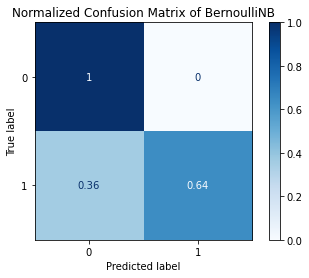

In [39]:
# Plot confusion matrix
confusionMatrix=plot_confusion_matrix(estimator=bnb_model,X=xtestData,y_true=ytestData,cmap=plt.cm.Blues,normalize='true',display_labels=le.classes_) # Plot the confusion matrix for given model
confusionMatrix.ax_.set_title('Normalized Confusion Matrix of BernoulliNB')
print(confusionMatrix)

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

In [41]:
ConfusionMatrixDisplay(confusionMatrix)

### Model 2 - Multinomial Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
mnb_model=MultinomialNB() # Creating object/ model

In [44]:
mnb_model.fit(xtrainData,ytrainData) # Training the model

MultinomialNB()

In [45]:
print(mnb_model.score(xtrainData,ytrainData)) # Accuracy on training data

0.87944582299421


In [46]:
acc_mnb=mnb_model.score(xtestData,ytestData) # Accuracy on testing data
Accuracies.append(acc_mnb)
print(acc_mnb)

0.8363636363636363


In [47]:
ytestPred_mnb=mnb_model.predict(xtestData) # Predict for test data

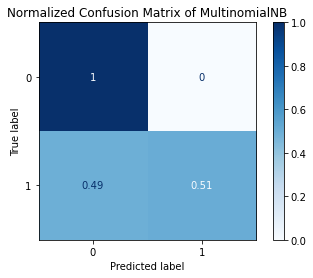

In [48]:
# Plot confusion matrix
confusionMatrix=plot_confusion_matrix(estimator=mnb_model,X=xtestData,y_true=ytestData,cmap=plt.cm.Blues,normalize='true',display_labels=le.classes_) # Plot the confusion matrix for given model
confusionMatrix.ax_.set_title('Normalized Confusion Matrix of MultinomialNB')
print(confusionMatrix)

### Model 3 - Artificial Neural Network (ANN)

In [49]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [60]:
model=Sequential() # Creating object/model

In [61]:
# Defining architecture of model
model.add(Dense(units=16,activation='relu',input_shape=(48652,))) # Input layer
model.add(Dropout(0.3)) # Hidden layer
model.add(Dense(units=32,activation='relu')) # Hidden layer
model.add(Dropout(0.4)) # Hidden layer
model.add(Dense(units=16,activation='relu')) # Hidden layer
model.add(Dropout(0.2)) # Hidden layer
model.add(Dense(units=8,activation='relu')) # Hidden layer
model.add(Dropout(0.1)) # Hidden layer
model.add(Dense(units=4,activation='relu')) # Hidden layer
model.add(Dense(units=2,activation='softmax')) # Output layer

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                778448    
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                

In [63]:
# model compilation
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [64]:
from keras.utils import to_categorical

In [65]:
# Outputs need to be converted to categorical
ytrainDataCat=to_categorical(ytrainData)
ytestDataCat=to_categorical(ytestData)

In [66]:
print(ytrainDataCat.shape,ytestDataCat.shape)

(4836, 2) (1210, 2)


In [67]:
# Sort the sparse matrices based on thier indices
xtrainData.sort_indices()
xtestData.sort_indices()

In [68]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpnt=ModelCheckpoint('./best_model.h5',monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto') # Whenever val_accuaracy is increased then current model is saved
earlystop=EarlyStopping(monitor='val_accuracy',min_delta=0.005,patience=5,verbose=1,mode='auto',restore_best_weights=True) # If val_accuarcy is not improved by 0.005 for 5 epochs then it will early stop

In [69]:
hist=model.fit(x=xtrainData,y=ytrainDataCat,batch_size=32,epochs=10,validation_data=(xtestData,ytestDataCat),callbacks=[checkpnt,earlystop]) # Train the model

Epoch 1/10
152/152 [==============================] - 6s 11ms/step - loss: 0.6602 - accuracy: 0.6884 - val_loss: 0.2755 - val_accuracy: 0.9455

Epoch 00001: val_accuracy improved from -inf to 0.94545, saving model to .\best_model.h5
Epoch 2/10
152/152 [==============================] - 1s 8ms/step - loss: 0.2281 - accuracy: 0.9160 - val_loss: 0.0871 - val_accuracy: 0.9645

Epoch 00002: val_accuracy improved from 0.94545 to 0.96446, saving model to .\best_model.h5
Epoch 3/10
152/152 [==============================] - 1s 8ms/step - loss: 0.1020 - accuracy: 0.9580 - val_loss: 0.0949 - val_accuracy: 0.9653

Epoch 00003: val_accuracy improved from 0.96446 to 0.96529, saving model to .\best_model.h5
Epoch 4/10
152/152 [==============================] - 1s 7ms/step - loss: 0.0872 - accuracy: 0.9596 - val_loss: 0.0880 - val_accuracy: 0.9653

Epoch 00004: val_accuracy did not improve from 0.96529
Epoch 5/10
152/152 [==============================] - 1s 7ms/step - loss: 0.0818 - accuracy: 0.9555

In [70]:
from keras.models import load_model

In [71]:
best_model=load_model('best_model.h5') # Load the best model with maximum val_accuracy

In [72]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                778448    
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                

In [73]:
np.max(hist.history['val_accuracy']) # val_accuracy of best model

0.9652892351150513

In [74]:
hist.history['accuracy'][np.argmax(hist.history['val_accuracy'])] # accuracy of best model

0.9565756916999817

In [75]:
best_model.evaluate(xtrainData,ytrainDataCat) 

152/152 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9642


[0.06938967108726501, 0.9642266631126404]

In [76]:
acc_ANN=best_model.evaluate(xtestData,ytestDataCat)[1]
Accuracies.append(acc_ANN)
print(acc_ANN)

38/38 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9653
0.9652892351150513


In [77]:
ytestPred_ANN=model.predict_classes(xtestData) # Predict for test data

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [78]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
confusionMatrix=confusion_matrix(y_true=ytestData,y_pred=ytestPred_ANN,normalize='true') # Plot the confusion matrix for given model
print(confusionMatrix)

[[0.95544554 0.04455446]
 [0.01741294 0.98258706]]


## Lets see the best model with best accuracy

In [79]:
print('Best accuracy is: ',np.max(Accuracies))
print('Best model is: ',modelDict[np.argmax(Accuracies)+1])

Best accuracy is:  0.9652892351150513
Best model is:  Artificial Nerual Network (ANN)


## Conclusion 
Artificial Neural Network (ANN) is the best model with highest <b>accuracy of 0.9653</b> for movie rating prediction